In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
df = pd.read_csv('breastcancer1 (3).csv')

In [5]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [16]:
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [17]:
df.dropna(inplace=True)
print("\nMissing values after treatment:")
print(df.isnull().sum())


Missing values after treatment:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [22]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])  # 1 for Malignant, 0 for Benign

X = df[['radius_mean', 'texture_mean']]
y = df['diagnosis']

# Step 5: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Implement KNN with different k-values
k_values = range(1, 21)
accuracy_scores = []

In [23]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
    print(f"K={k}, Accuracy: {acc:.4f}")

K=1, Accuracy: 0.8018
K=2, Accuracy: 0.7838
K=3, Accuracy: 0.8198
K=4, Accuracy: 0.8198
K=5, Accuracy: 0.8108
K=6, Accuracy: 0.8108
K=7, Accuracy: 0.8108
K=8, Accuracy: 0.7928
K=9, Accuracy: 0.8198
K=10, Accuracy: 0.8018
K=11, Accuracy: 0.8198
K=12, Accuracy: 0.8108
K=13, Accuracy: 0.8288
K=14, Accuracy: 0.8198
K=15, Accuracy: 0.8198
K=16, Accuracy: 0.8198
K=17, Accuracy: 0.8198
K=18, Accuracy: 0.8288
K=19, Accuracy: 0.8288
K=20, Accuracy: 0.8378


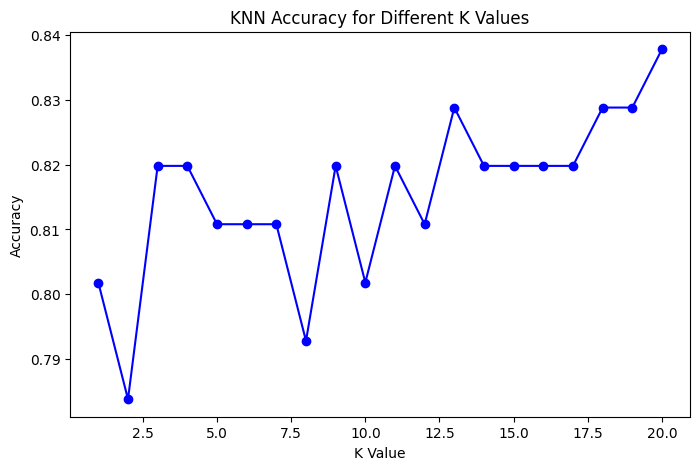

In [24]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
plt.show()

In [25]:
# best model (with highest accuracy)
best_k = k_values[np.argmax(accuracy_scores)]
print(f"\nBest K value: {best_k}")

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)


Best K value: 20


In [26]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


Confusion Matrix:
[[60  3]
 [15 33]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        63
           1       0.92      0.69      0.79        48

    accuracy                           0.84       111
   macro avg       0.86      0.82      0.83       111
weighted avg       0.85      0.84      0.83       111



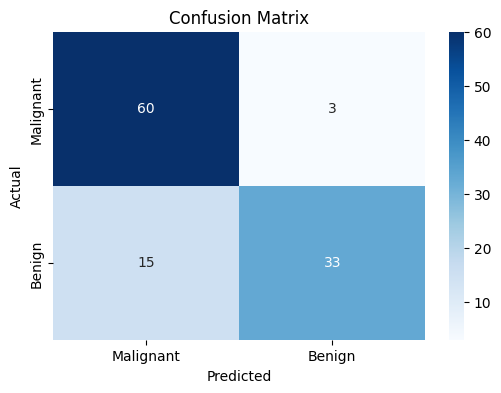

In [29]:
cm = confusion_matrix(y_test, y_pred_best)
class_names = ['Malignant', 'Benign']
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()